<a href="https://colab.research.google.com/github/h0etsumu/BARCELONA---CPE-313/blob/main/Barcelona_Hands_on_Activity_1_3_Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Activity 1.3 : Regularization

***Barcelona, Jacob Seth S.*** <br>
***CPE32S8*** <br>
***Instructor: Engr. Roman Richard***

#### Objective(s):

This activity aims to demonstrate how to apply  regularization in neural networks

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train neural networks with regularization
* Demonstrate how to visualize the model with regularization
* Evaluate the result of model with regularization


#### Resources:
* Jupyter Notebook
* MNIST


#### Procedures
Load the necessary libraries

In [ ]:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Load the data, shuffled and split between train and test sets

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Get the size of the sample train data

In [ ]:
x_train[0].shape

(28, 28)

Check the sample train data

In [ ]:
x_train[333]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  87, 138,
        170, 253, 201, 244, 212, 222, 138,  86,  22,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  95, 253, 252,
        252, 252, 252, 253, 252, 252, 252, 252, 245,  80,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  68, 246, 205,  69,
         69,  69,  69,  69,  69,  69,  69, 205, 253, 240,  50,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 187, 252, 218,  34,
          0,   0,   0,   0,   0,   0,   0, 116, 253, 252,  69,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 116, 248, 252, 253,  92,
          0,   0,   0,   0,   0,   0,  95, 230, 253, 157,   6,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 116, 249, 253, 189,  42,
          0,   0,   0,   0,  36, 170, 253, 243, 158,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 133, 252, 245, 140,
         34,   0,   0,  57, 219, 252, 235,  60,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  25, 205, 253, 252,
        234, 184, 184, 253, 240, 100,  44,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  21, 161, 219,
        252, 252, 252, 234,  37,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 203,
        252, 252, 252, 251, 135,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   9,  76, 255, 253,
        205, 168, 220, 255, 253, 137,   5,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 114, 252, 249, 132,
         25,   0,   0, 180, 252, 252,  45,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  51, 220, 252, 199,   0,
          0,   0,   0,  38, 186, 252, 154,   7,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 184, 252, 252,  21,   0,
          0,   0,   0,   0,  67, 252, 252,  22,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 184, 252, 200,   0,   0,
          0,   0,   0,   0,  47, 252, 252,  22,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 185, 253, 201,   0,   0,
          0,   0,   0,   3, 118, 253, 245,  21,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 163, 252, 252,   0,   0,
          0,   0,   0,  97, 252, 252,  87,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  51, 240, 252, 123,  70,
         70, 112, 184, 222, 252, 170,  13,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 165, 252, 253, 252,
        252, 252, 252, 245, 139,  13,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

Check the corresponding label in the training set

In [ ]:
y_train[333]

8

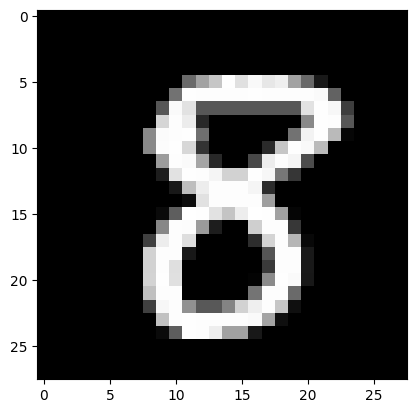

In [ ]:
# Check the actual image
plt.imshow(x_train[333], cmap='Greys_r')

Check the shape of the x_train and x_test

In [ ]:
print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

(60000, 28, 28) train samples
(10000, 28, 28) test samples


* Convert the x_train and x_test
* Cast the numbers to floats
* Normalize the inputs

In [ ]:
x_train = x_train.reshape(len(x_train), 28*28)
x_test = x_test.reshape(len(x_test), 28*28)


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


x_train /= 255
x_test /= 255

Convert class vectors to binary class matrices

In [ ]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

y_train[333]  # now the digit k is represented by a 1 in the kth entry (0-indexed) of the length 10 vector

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

* Build the model with two hidden layers of size 512.
* Use dropout of 0.2
* Check the model summary

In [ ]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 55050 (215.04 KB)
Trainable params: 55050 (215.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


***By default, the size of the hidden layers is 64, but 512 was instructed. Upon using the instructed size, the overall seems to fluctuate, and it did not yield amicable results. However, using the default input size that was originally stated in the code block, the model improved compared when having its hidden layer size at a huge vlaue.***

Compile the model using learning rate of 0.001 and optimizer of RMSprop

In [ ]:
learning_rate = .001
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=learning_rate),
              metrics=['accuracy'])
batch_size = 128  # mini-batch with 128 examples
epochs = 30
history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Epoch 1/30
469/469 [==============================] - 4s 5ms/step - loss: 0.5187 - accuracy: 0.8461 - val_loss: 0.2049 - val_accuracy: 0.9399
Epoch 2/30
469/469 [==============================] - 2s 4ms/step - loss: 0.2558 - accuracy: 0.9258 - val_loss: 0.1505 - val_accuracy: 0.9561
Epoch 3/30
469/469 [==============================] - 2s 4ms/step - loss: 0.2065 - accuracy: 0.9390 - val_loss: 0.1292 - val_accuracy: 0.9612
Epoch 4/30
469/469 [==============================] - 2s 4ms/step - loss: 0.1791 - accuracy: 0.9456 - val_loss: 0.1123 - val_accuracy: 0.9648
Epoch 5/30
469/469 [==============================] - 2s 4ms/step - loss: 0.1584 - accuracy: 0.9530 - val_loss: 0.1068 - val_accuracy: 0.9666
Epoch 6/30
469/469 [==============================] - 2s 4ms/step - loss: 0.1460 - accuracy: 0.9561 - val_loss: 0.1030 - val_accuracy: 0.9704
Epoch 7/30
469/469 [==============================] - 2s 5ms/step - loss: 0.1379 - accuracy: 0.9589 - val_loss: 0.0959 - val_accuracy: 0.9710
Epoch 

Use Keras evaluate function to evaluate performance on the test set

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.09207793325185776
Test accuracy: 0.9763000011444092


## Interpret the result

***Based on the given test loss and test accuracy score, it indicates that this model is decent, considering that the validating accuracy is high along with a low score of the model's loss. It can be interpreted that it is performing well in training and unseen data - lower test loss score indicates that the model is reliable and robust. It can also be interpreted that the model can generalize effectively based on unseen data.***

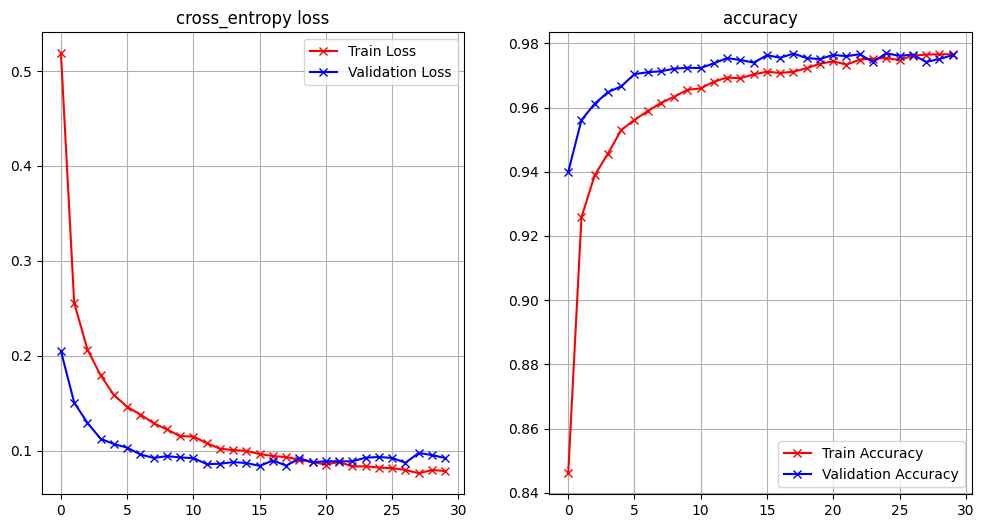

In [ ]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)


plot_loss_accuracy(history)

## Interpret the result

***Based on the graph above, accuracy-wise, the model is robust starting from the 20th epoch. It does not fluctuate compared to the first few epochs.***

***Loss-wise, the model started to not fluctate around the epochs of 18-22. Starting from the 13-15 epochs, the loss score did not go any higher than 0.1. To reiterate, low test loss is desirable, since it indicates that the model is performing well in training and unseen data.***

***The parameters that were used indicates that it is suitable for this dataset; however, further training may cause the model to overfit. Hence, adjustments of the parameters would be advisable since the loss graph indicates that it still fluctuates - suggesting that this model is quite inconsistent.***

# Supplementary Activity

* Use the Keras "Sequential" functionality to build a new model (model_1) with the following specifications:

1. Two hidden layers.
2. First hidden layer of size 400 and second of size 300
3. Dropout of .4 at each layer
4. How many parameters does your model have?  How does it compare with the previous model?
5. Train this model for 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128
6. Use at least two  regularization techniques and apply it to the new model (model_2)
7. Train this model for your preferred epochs , learning rate, batch size and optimizer
8. Compare the accuracy and loss (training and validation) of model_1 and model_2

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
filepath = "/content/drive/MyDrive/Datasci3/voice.csv"
voice = pd.read_csv(filepath)

In [ ]:
print(voice.shape)
voice.sample(5)

(3168, 21)


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
2975,0.170190,0.059224,0.161059,0.142527,0.208736,0.066209,2.840125,12.498467,0.918979,0.512841,...,0.170190,0.135526,0.017953,0.270270,0.357384,0.004883,1.362305,1.357422,0.199150,female
1794,0.178691,0.043086,0.181194,0.164169,0.201260,0.037090,2.112956,6.987666,0.869629,0.338455,...,0.178691,0.166865,0.030132,0.266667,0.592052,0.023438,5.492188,5.468750,0.086327,female
1087,0.193051,0.054728,0.208095,0.145714,0.240000,0.094286,1.432647,4.601248,0.905284,0.325613,...,0.193051,0.119274,0.047525,0.279070,0.850731,0.023438,5.320312,5.296875,0.144838,male
2516,0.199749,0.037764,0.196429,0.177500,0.224643,0.047143,1.549451,4.851962,0.876909,0.250712,...,0.199749,0.160722,0.053274,0.274286,1.955776,0.187500,7.734375,7.546875,0.106383,female
694,0.153965,0.060739,0.159519,0.098718,0.199679,0.100962,2.705834,11.406721,0.900475,0.408400,...,0.153965,0.095803,0.028249,0.208333,0.432478,0.097656,0.825195,0.727539,0.843289,male


In [ ]:
voice.dtypes

meanfreq    float64
sd          float64
median      float64
Q25         float64
Q75         float64
IQR         float64
skew        float64
kurt        float64
sp.ent      float64
sfm         float64
mode        float64
centroid    float64
meanfun     float64
minfun      float64
maxfun      float64
meandom     float64
mindom      float64
maxdom      float64
dfrange     float64
modindx     float64
label        object
dtype: object

***Since the datatype of the target variable "label" is an object, it must be converted into an integer. For that to happen, transforming using label encoder would be used. Wherein male and female would be converted into 0s and 1.***

In [ ]:
voice['label'].astype(str)

0         male
1         male
2         male
3         male
4         male
         ...  
3163    female
3164    female
3165    female
3166    female
3167    female
Name: label, Length: 3168, dtype: object

In [ ]:
voice['label'].value_counts()

male      1584
female    1584
Name: label, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

voice['label'] = le.fit_transform(voice['label'])

In [ ]:
voice['label'].astype(int)

0       1
1       1
2       1
3       1
4       1
       ..
3163    0
3164    0
3165    0
3166    0
3167    0
Name: label, Length: 3168, dtype: int64

In [ ]:
normalizer = StandardScaler()

voice.iloc[:, :-1] = normalizer.fit_transform(voice.iloc[:, :-1])

In [ ]:
X2 = voice.iloc[:, :-1]
y2 = voice.iloc[:, -1:]

***The two block of codes indicate the dependent and independent variables using slicing. Additionally, the independent values were scaled for better accuracy. Naturally, the target variable was excluded from the scaling.***

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.25, random_state=11111)

- Two hidden layers.
- First hidden layer of size 400 and second of size 300
- Dropout of .4 at each layer

In [ ]:
model_1 = Sequential()
model_1.add(Dense(400, activation='relu', input_shape=(20,)))
model_1.add(Dropout(0.4))
model_1.add(Dense(300, activation='relu'))
model_1.add(Dropout(0.4))
model_1.add(Dense(1, activation='sigmoid'))

In [ ]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 400)               8400      
                                                                 
 dropout_2 (Dropout)         (None, 400)               0         
                                                                 
 dense_4 (Dense)             (None, 300)               120300    
                                                                 
 dropout_3 (Dropout)         (None, 300)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 301       
                                                                 
Total params: 129001 (503.91 KB)
Trainable params: 129001 (503.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


- How many parameters does your model have?  How does it compare with the previous model?

***In this model, there are a total of 129,001 training parameters indicated above. Contrastly with the other model, there are only 55050. The reason is it varies on the dataset, network structure, and parameters that are used.***

- Train this model for 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128

In [ ]:
learning_rate = .001
model_1.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=learning_rate),
              metrics=['accuracy'])
batch_size = 128
epochs = 20
history_1 = model_1.fit(
    X2_train, y2_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(X2_test, y2_test))

Epoch 1/20
19/19 [==============================] - 1s 17ms/step - loss: 0.0482 - accuracy: 0.9827 - val_loss: 0.0521 - val_accuracy: 0.9785
Epoch 2/20
19/19 [==============================] - 0s 8ms/step - loss: 0.0456 - accuracy: 0.9802 - val_loss: 0.0527 - val_accuracy: 0.9811
Epoch 3/20
19/19 [==============================] - 0s 9ms/step - loss: 0.0420 - accuracy: 0.9857 - val_loss: 0.0552 - val_accuracy: 0.9773
Epoch 4/20
19/19 [==============================] - 0s 8ms/step - loss: 0.0439 - accuracy: 0.9844 - val_loss: 0.0580 - val_accuracy: 0.9773
Epoch 5/20
19/19 [==============================] - 0s 7ms/step - loss: 0.0444 - accuracy: 0.9848 - val_loss: 0.0511 - val_accuracy: 0.9798
Epoch 6/20
19/19 [==============================] - 0s 8ms/step - loss: 0.0413 - accuracy: 0.9857 - val_loss: 0.0532 - val_accuracy: 0.9785
Epoch 7/20
19/19 [==============================] - 0s 8ms/step - loss: 0.0351 - accuracy: 0.9874 - val_loss: 0.0518 - val_accuracy: 0.9785
Epoch 8/20
19/19 [=

***Binary cross entropy was used in this model since the objective is only to classify where the voice belongs to a male or female.***

In [ ]:
score_1 = model_1.evaluate(X2_test, y2_test, verbose=0)
print('Test loss:', score_1[0])
print('Test accuracy:', score_1[1])

Test loss: 0.050471920520067215
Test accuracy: 0.9797979593276978


***It could be seen here that the test loss is low and the test accuracy is amicably high. It can be inferred that the model is performing well in predicting labels in unseen data. The model is robust in classifying male and female voices. Once again, the lower the test loss, the better since it indicates that it is performing well. On the other hand, the higher the test accuracy is, the better the model is in generalizing on unseen data.However, the model may still suffer from underfitting since  the model was only trained for 20 epochs.***

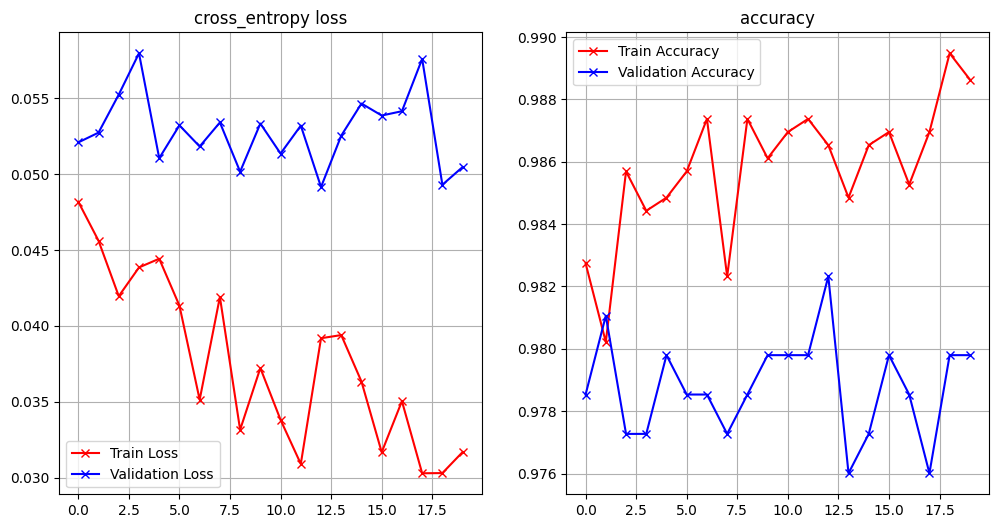

In [ ]:
def plot_loss_accuracy(history_1):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history_1.history["loss"],'r-x', label="Train Loss")
    ax.plot(history_1.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history_1.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history_1.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)


plot_loss_accuracy(history_1)

***Based on the two graphs above, the model indeed indicates underfitting since the loss for unseen data is high compared to when it is trained. On the other hand, the accuracy indicates that the model is also overfitting since the accuracy for training is high compared to when it is tested. Although the point difference is low between the training and validation accuracy, the model is still proved to be inconsistent since it is only trained for 20 epochs.***

***Overall, the first model in the procedure is consistent compared with this model, it is probably because of the parameters that was used in training the model.***

- Use at least two  regularization techniques and apply it to the new model (model_2)
- Train this model for your preferred epochs , learning rate, batch size and optimizer

In [ ]:
model_2 = Sequential()
model_2.add(Dense(400, activation='relu', input_shape=(20,)))
model_2.add(Dropout(0.8))
model_2.add(Dense(410, activation='relu', kernel_regularizer='l2'))
model_2.add(Dropout(0.8))
model_2.add(Dense(420, activation='relu'))
model_2.add(Dropout(0.8))
model_2.add(Dense(1, activation='sigmoid'))

In [ ]:
model_2.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_80 (Dense)            (None, 400)               8400      
                                                                 
 dropout_60 (Dropout)        (None, 400)               0         
                                                                 
 dense_81 (Dense)            (None, 410)               164410    
                                                                 
 dropout_61 (Dropout)        (None, 410)               0         
                                                                 
 dense_82 (Dense)            (None, 420)               172620    
                                                                 
 dropout_62 (Dropout)        (None, 420)               0         
                                                                 
 dense_83 (Dense)            (None, 1)               

***In this model, a total of 345,851 trainable parameters are available, this is the highest parameter among the three models that was trained in this activity. It is because of the high size of the hidden layer - which is the network structure, and of course the parameters that was used.***

***A total of 3 hidden layer with two regularization techniques (kernel regularizer, and droput), and one final layer with a sigmoid activation function was used in this model.***

In [ ]:
learning_rate = .003
model_2.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=learning_rate),
              metrics=['accuracy'])
batch_size = 45
epochs = 80
history_2 = model_2.fit(
    X2_train, y2_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(X2_test, y2_test))

Epoch 1/80
53/53 [==============================] - 1s 12ms/step - loss: 3.2672 - accuracy: 0.6747 - val_loss: 2.1778 - val_accuracy: 0.9003
Epoch 2/80
53/53 [==============================] - 0s 9ms/step - loss: 1.7173 - accuracy: 0.8779 - val_loss: 1.0530 - val_accuracy: 0.9470
Epoch 3/80
53/53 [==============================] - 0s 9ms/step - loss: 0.8476 - accuracy: 0.9339 - val_loss: 0.5116 - val_accuracy: 0.9646
Epoch 4/80
53/53 [==============================] - 0s 9ms/step - loss: 0.4408 - accuracy: 0.9516 - val_loss: 0.2816 - val_accuracy: 0.9710
Epoch 5/80
53/53 [==============================] - 0s 9ms/step - loss: 0.2796 - accuracy: 0.9571 - val_loss: 0.1989 - val_accuracy: 0.9672
Epoch 6/80
53/53 [==============================] - 0s 9ms/step - loss: 0.1986 - accuracy: 0.9668 - val_loss: 0.1583 - val_accuracy: 0.9684
Epoch 7/80
53/53 [==============================] - 0s 9ms/step - loss: 0.1672 - accuracy: 0.9676 - val_loss: 0.1402 - val_accuracy: 0.9710
Epoch 8/80
53/53 [=

In [ ]:
score_2 = model_2.evaluate(X2_test, y2_test, verbose=0)
print('Test loss:', score_2[0])
print('Test accuracy:', score_2[1])

Test loss: 0.09733282774686813
Test accuracy: 0.9747474789619446


***Based on the values above, this also indicates that the model is performing well in predicting the labels whether the voice belongs to a male or female.***

***In this model, a different set of network structure and parameters were used although with the same voice dataset. Comparing it with model_1, whose test loss is 0.05, while this model's test loss is 0.09, this model has a slightly bigger test loss. In terms of accuracy, model_1 also has a higher test score, which indicates that the previous model is more capable of generalizing unseen data - the previous model has a total score of 0.9797 while this model has a total accuracy score of 0.9747.***

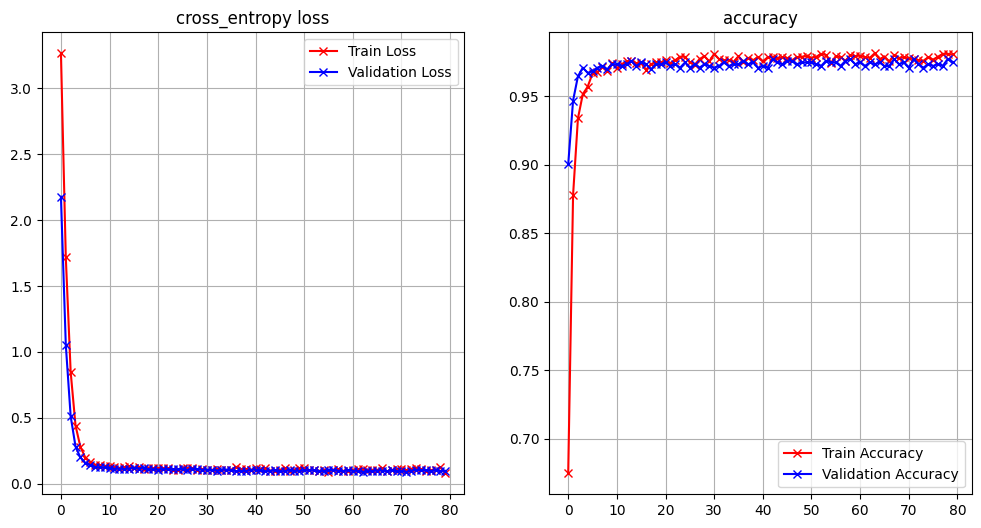

In [ ]:
def plot_loss_accuracy(history_2):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history_2.history["loss"],'r-x', label="Train Loss")
    ax.plot(history_2.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history_2.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history_2.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)


plot_loss_accuracy(history_2)

***Based on the graph above, the loss and accuracy is consistent, considering that it barely fluctuates at all - which is a good sign. Since fluctuation on a graph means inconsistency.***

***Starting somewhere around 7th - 8th epoch, the model started to not fluctuate, and it did not show any signs of underfitting or overfitting. The same case goes with the loss graph, it stayed consistent, considering that it had a low loss score in the beginning.***

***Overall, this model is robust with the used parameters, and this is an ideal model for this dataset since it generalized well on both training and unseen data.***

- Compare the accuracy and loss (training and validation) of model_1 and model_2

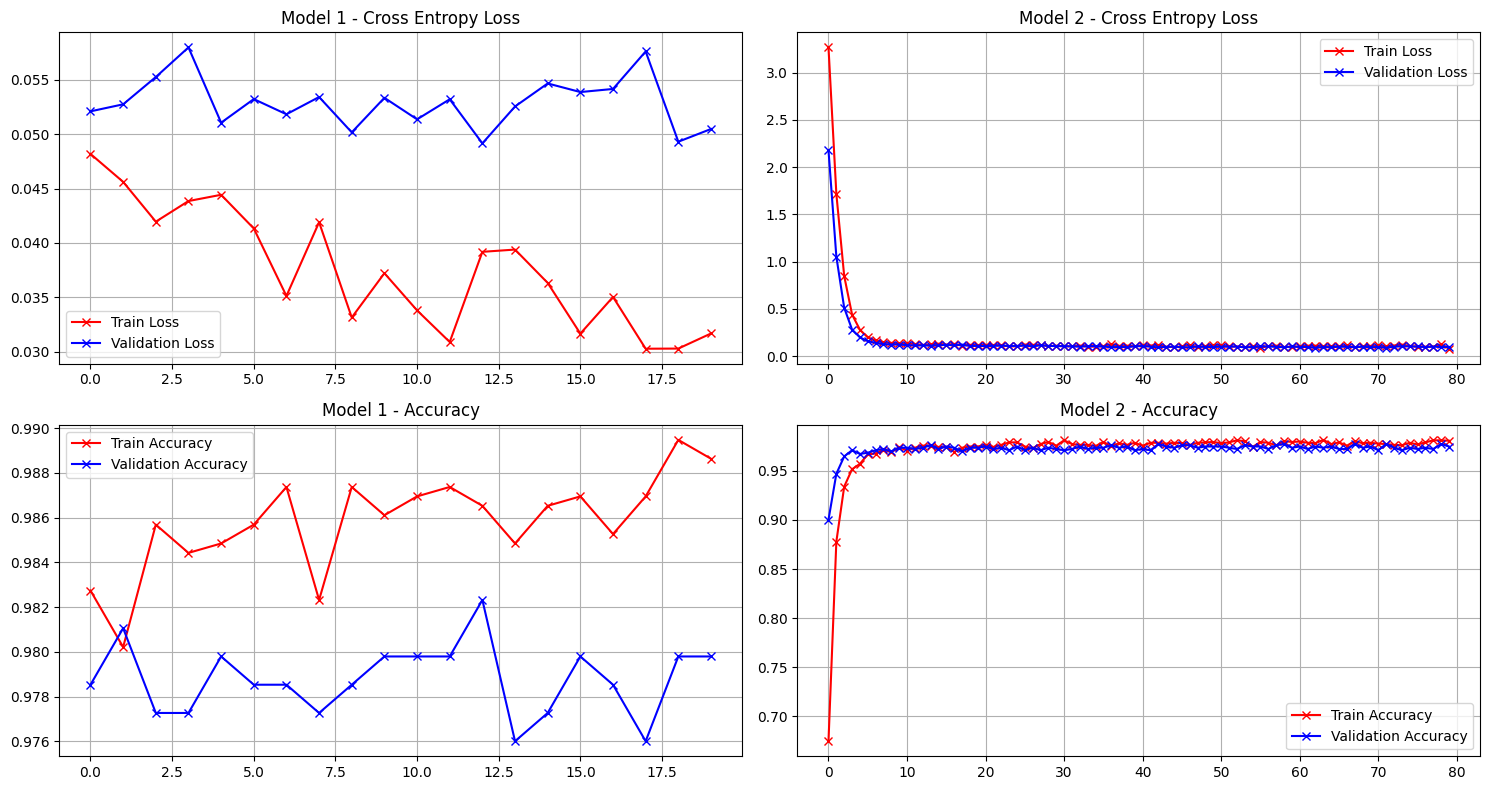

In [ ]:
import matplotlib.pyplot as plt

def plot_loss_accuracy(histories, titles):
    fig, axs = plt.subplots(2, len(histories), figsize=(15, 8))

    for i, (history, title) in enumerate(zip(histories, titles)):
        axs[0, i].plot(history.history["loss"], 'r-x', label="Train Loss")
        axs[0, i].plot(history.history["val_loss"], 'b-x', label="Validation Loss")
        axs[0, i].legend()
        axs[0, i].set_title(title + ' - Cross Entropy Loss')
        axs[0, i].grid(True)

        axs[1, i].plot(history.history["accuracy"], 'r-x', label="Train Accuracy")
        axs[1, i].plot(history.history["val_accuracy"], 'b-x', label="Validation Accuracy")
        axs[1, i].legend()
        axs[1, i].set_title(title + ' - Accuracy')
        axs[1, i].grid(True)

    plt.tight_layout()
    plt.show()

# Example usage:
plot_loss_accuracy([history_1, history_2], ['Model 1', 'Model 2'])


***Comparing the two models, it can be seen that model 2 is more consistent compared with the first model. Upon observation, it can be seen that the 2nd model started to not fluctuate around 7th - 8th epoch; meanwhile, the first model already started to fluctuate from the first few epochs. At 10th epoch, the 2nd model did not fluctuate for both loss and accuracy. Contrastly, the first model did not achieve that consistency.***

***The reason is because of the difference of network structure and different parameters that was used. Although it had the same dataset, it still yielded different results.***

***Therefore, it can be inferred that the second model is more suited in predicting whether the voice belongs to a male or female. Additionally, despite the training period is prolonged, the 2nd model still yielded accurate and consistent results.***

## Conclusion

***In this regularization activity, I was ableto demonstrate how to apply regularization on neural networks. Bulding and training neural networks with the concept of regularization, and also visualizing and evaluating the model with regularization was successfully executed in this activity. Moreover, this activity was similar to the previous activity, the only thing that differed is the network structure and other parameters to compile and further evaluate the model.***

***I also learned the proper parameters that should be used in regularization, and regularization is a technique used to prevent underfitting or overfitting. The problems that I encountered in this activity is my wrong usage of dataset, no matter how much I tried to manipulate and modify the network structure and training parameters, it still gave a low and inconsistent model. The previous dataset that I used is breast cancer, and although the dataset was usable, I wasn't able to find the proper parameters that came with the dataset. However, in this dataset, I was able to find the correct network structure to build a robust model in terms of classifiying male and female voices.***

***In a nutshell, I learned that this technique is useful especially when you want to achieve a much more stable and consistent model (since it prevents overfitting and underfitting).***